## 1º Entendendo o problema de negócio

# #### É importante que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram.

###### O conjunto de dados contém transações feitas por **cartões de crédito em setembro de 2013** por titulares de cartões europeus.
###### Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos **492 fraudes em 284.807 transações**. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) responde por 0,172% de todas as transações.
###### Ele **contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA**. Características V1, V2, … V28 são os principais componentes obtidos com PCA, as únicas características que não foram transformadas com PCA são 'Tempo' e 'Valor'. 
###### O recurso '**Tempo**' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso '**Valor**' é o Valor da transação, esse recurso pode ser usado para aprendizado sensível ao custo dependente de exemplo. O recurso '**Class' é a variável de resposta** e assume valor 1 em caso de fraude e 0 caso contrário.
###### Dada a razão de desequilíbrio de classe, faremos a ***precisão usando a Área sob a Curva de Recuperação de Precisão (AUPRC)***. A precisão da matriz de confusão não é significativa para a classificação desequilibrada.


###### As informações foram retiradas de: [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

## 2º Análise exploratória

In [ ]:
# Importando as bibliotecas:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import metrics

In [ ]:
# Lendo o arquivo .CSV e visualizando seus 5 primeiros valores:
creditcard = pd.read_csv('credit_card.csv')
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Tipos de variáveis e dimensão do dataframe:
creditcard.info()
#### Como as variáveis já foram previamente tratadas pelo fornecedor do arquivo, aparentemente não existem maiores problemas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Encontrando dados faltantes:
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 1.0, 'Variável de resposta')

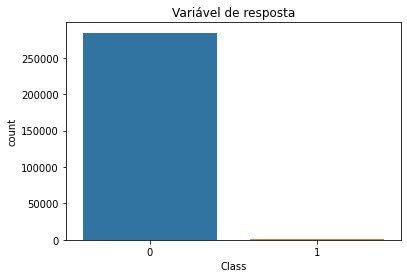

In [ ]:
# Histrograma da variável de resposta:
creditcard.Class.value_counts()
sns.countplot(creditcard.Class)
plt.title('Variável de resposta')
#### Como já falado, a variável está desbalanceada. Será necessário tratamento (com o smoothing target, por exemplo).

In [ ]:
# Verificando a correlação de pares:
creditcard.corr().Class.sort_values(ascending=False)
#### A coluna com menor correlação é: V22.

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

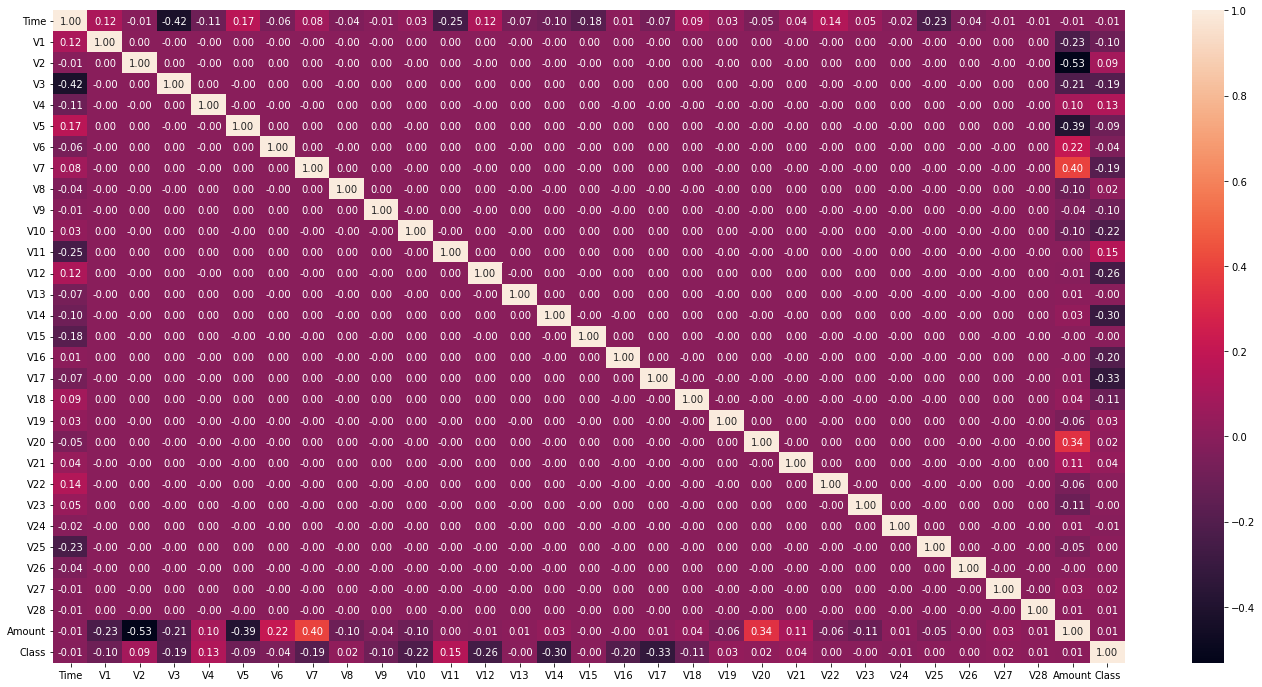

In [ ]:
# Verificando a correlação visualmente:
f, ax = plt.subplots(figsize=(24,12))
sns.heatmap(creditcard.corr(), annot=True, fmt='.2f')
#### As características V1, V2, … V28 não se relacionam, portanto são todas necessárias.

In [ ]:
# Detalhes estatísticos básicos:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 1.0, 'Outliers relacionados com V17')

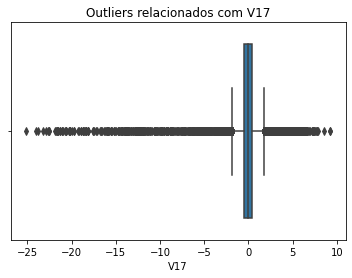

In [ ]:
# Outliers relacionados com V17 (variável com maior correlação com a 'Class'):
sns.boxplot(creditcard.V17)
plt.title('Outliers relacionados com V17')
#### Existem outliers em quase todas as variáveis. Porém, eles são essenciais para encontrarmos as fraudes.

## 3º Pré-processamento dos dados

In [ ]:
# Determinando as variáveis em dependentes e independentes:
X = creditcard.iloc[:, 0:30]
y = creditcard.iloc[:, 30]
# Train Test Split (inicialmente vou guardar 20% dos valores para teste):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## 4º Criando a máquina preditiva

#### Random Forest Classifier (utilizado pois o resultado 'Dataset' é binário):

In [ ]:
# Random Forest Classifier:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

In [ ]:
# Predição (passando dados de teste para o modelo):
y_pred = rfc.predict(X_test)

In [ ]:
# Comparação valores reais x previstos
real_vs_previsto = pd.DataFrame({'Gabarito (valor real)': y_test,
                                 'Previsão_Máquina_Preditiva': y_pred})
real_vs_previsto

,Gabarito (valor real),Previsão_Máquina_Preditiva
86801,0,0
34867,0,0
151239,0,0
122560,0,0
77820,0,0
...,...,...
148979,0,0
78457,0,0
144869,0,0
258827,0,0


In [ ]:
# Pontuação do modelo:
print('Métricas de classificação: \n', classification_report(y_test, y_pred))
print('Acurácia: \n', accuracy_score(y_test, y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Métricas de classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.81      0.87       100

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Acurácia: 
 0.9995786664794073
Matriz de confusão: 
 [[56857     5]
 [   19    81]]


0.9049560339066512


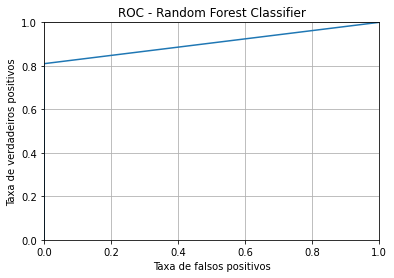

In [ ]:
# Precisão usando a Área sob a Curva de Recuperação de Precisão (AUPRC):
#### Utilizada devido ao alto desequilíbrio de classe.
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC - Random Forest Classifier')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.grid(True)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
# Quanto maior a área sob a curva, melhor.

#### XGBClassifier (utilizado pois o resultado 'Dataset' é binário):

In [ ]:
# XGBClassifier:
XGB = XGBClassifier(learning_rate=1.5, max_depth=10)
XGB = XGB.fit(X_train, y_train)

In [ ]:
# Predição (passando dados de teste para o modelo):
y_pred = XGB.predict(X_test)

In [ ]:
# Pontuação do modelo:
print('Métricas de classificação: \n', classification_report(y_test, y_pred))
print('Acurácia: \n', accuracy_score(y_test, y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Métricas de classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.90      0.81      0.85       100

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Acurácia: 
 0.9995084442259752
Matriz de confusão: 
 [[56853     9]
 [   19    81]]


In [ ]:
# Comparação valores reais x previstos
real_vs_previsto = pd.DataFrame({'Gabarito (valor real)': y_test,
                                 'Previsão_Máquina_Preditiva': y_pred})
real_vs_previsto

,Gabarito (valor real),Previsão_Máquina_Preditiva
86801,0,0
34867,0,0
151239,0,0
122560,0,0
77820,0,0
...,...,...
148979,0,0
78457,0,0
144869,0,0
258827,0,0


0.9049208610319722


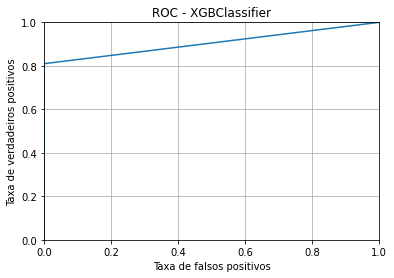

In [ ]:
# Precisão usando a Área sob a Curva de Recuperação de Precisão (AUPRC):
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC - XGBClassifier')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.grid(True)

print(roc_auc_score(y_test, y_pred))

## 5º Escolhendo a máquina preditiva

O modelo Random Forest Classifier apresentou maior precisão e, portanto, foi o escolhido para a máquina preditiva.

In [ ]:
# Utilizando a Máquina Preditiva - fazendo previsões com novos dados
novas_previsoes = rfc.predict(X_test)
print(novas_previsoes)